# Cars selling

##### Made by: Pavlo Kukurik, Sviatoslav Sharak

## **DATA DESCRIPTION**
 * **Size:** We have 558,837 observations (data points). 
* **Features (16 total):**
    * **Quantitative Features (Features with numerical values)**
        * **`year`** (int64): The vehicle's manufacturing year.
        * **`condition`** (float64):  The condition of the vehicle (likely on a numerical scale).
        * **`odometer`** (float64): The vehicle's mileage.
        * **`mmr`** (float64):  The Mannheim Market Report value (estimated market value).
        * **`sellingprice`** (float64): The final price at which the vehicle was sold.

    * **Qualitative Features (Features with categorical values)**
        * **`make`** (object): The vehicle's brand/manufacturer.
        * **`model`** (object):  The vehicle's specific model.
        * **`trim`** (object): Additional specification within the model.
        * **`body`** (object):  The vehicle's body type (e.g., Sedan, SUV, etc.).
        * **`transmission`** (object): The type of transmission (e.g., automatic, manual).
        * **`vin`** (object): The vehicle's unique Vehicle Identification Number.
        * **`state`** (object): The state where the vehicle is registered.
        * **`color`** (object): The vehicle's exterior color. 
        * **`interior`** (object): The vehicle's interior color.
        * **`seller`** (object): The entity that sold the vehicle.
        * **`saledate`** (object): The date and time of the sale.


In [1]:
# importing libraries
# import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('car_prices.csv')
df.head(1000)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2012,Ford,Escape,Limited,SUV,automatic,1fmcu0e7xckc08558,ca,47.0,30843.0,white,beige,ford motor credit company llc pd,15750.0,16000.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
996,2012,Dodge,Grand Caravan,American Value Package,Minivan,automatic,2c4rdgbgxcr138394,ca,44.0,97805.0,silver,black,wheels exchange llc,7975.0,8900.0,Wed Dec 17 2014 12:30:00 GMT-0800 (PST)
997,2012,Chevrolet,Cruze,1LT,Sedan,automatic,1g1pf5sc5c7318718,ca,42.0,26691.0,white,gray,ge fleet services for itself/servicer,10450.0,11500.0,Tue Dec 16 2014 12:00:00 GMT-0800 (PST)
998,2012,Dodge,Grand Caravan,SXT,Minivan,automatic,2c4rdgcg2cr308102,ca,29.0,54064.0,black,beige,tdaf remarketing,10650.0,11750.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)


In [3]:
df.describe()

### **Firstly Let`s clean our dataset**

In [3]:
# First let`s drop useless columns (vin, seller).
if 'vin' in df.columns:
    df = df.drop(columns='vin')

if 'seller' in df.columns:
    df = df.drop(columns='seller')

# # Delete all NaN rows from dataset    
df = df.dropna()

In [5]:
# Let`s check how many values in each column are NaM
df.isna().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
state           0
condition       0
odometer        0
color           0
interior        0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [6]:
# # Here we can see how df has changed 
df.describe()

,year,condition,odometer,mmr,sellingprice
count,472325.000000,472325.000000,472325.000000,472325.000000,472325.000000
mean,2010.210980,30.774177,66701.732040,13837.058964,13690.512058
std,3.822151,13.286866,51939.586894,9532.229273,9613.033738
min,1990.000000,1.000000,1.000000,25.000000,1.000000
25%,2008.000000,24.000000,28137.000000,7425.000000,7200.000000
50%,2012.000000,35.000000,51085.000000,12300.000000,12200.000000
75%,2013.000000,41.000000,96590.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


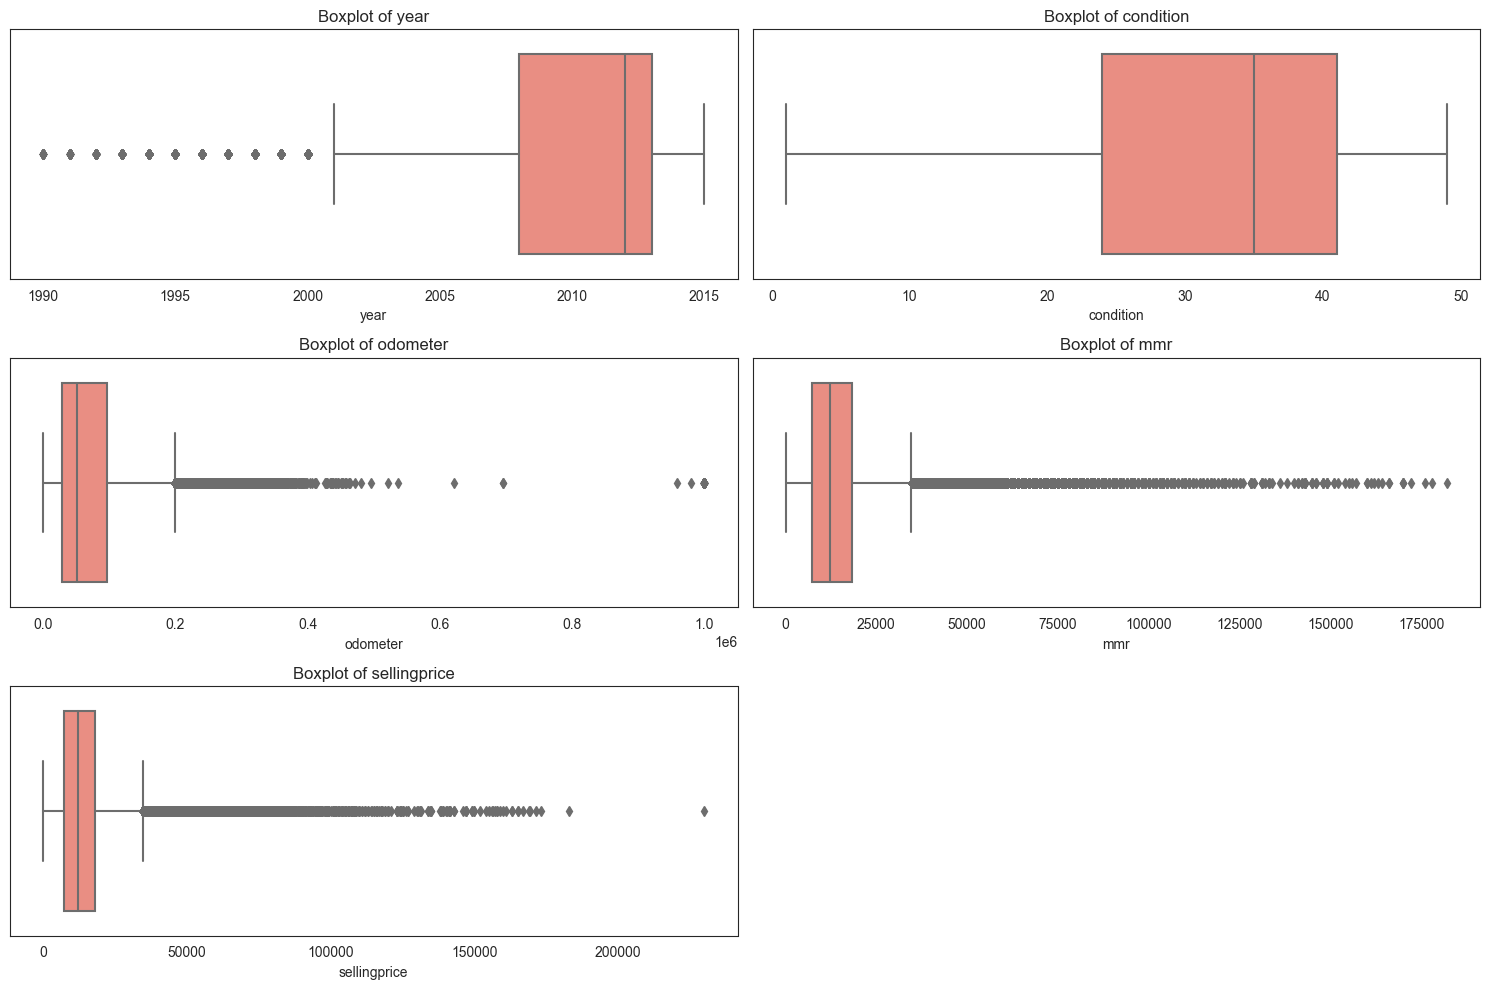

In [4]:
# Let visualise boxplot to see outliers for each numeric columns
def box_plot(data: pd.DataFrame) -> plt:
    """
    The func visualise the boxplot
    :param data: name of dataframe
    :return: plot
    """
    sns.set_style("white")
    numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
    plt.figure(figsize=(15, 10))
    
    for i, col in enumerate(numeric_cols):
        plt.subplot(len(numeric_cols)//2 + 1, 2, i+1)
        sns.boxplot(x=data[col], color='salmon')
        plt.title(f'Boxplot of {col}', fontsize=12)
        plt.xlabel(col, fontsize=10)
    plt.tight_layout()
    plt.show()
    
box_plot(df)

In [5]:
def bound_counter(data: pd.DataFrame) -> tuple[pd, pd]:
    """
    The func calculate upper and lower bounds
    :param data: name of dataset
    :return: values of bounds
    """
    Q1 = data.quantile(0.25, numeric_only=True)
    Q3 = data.quantile(0.75, numeric_only=True)
    
    IQR = Q3 - Q1
    
    threshold = 1.5
    
    lower_bound_ = Q1 - threshold * IQR
    upper_bound_ = Q3 + threshold * IQR
    
    return lower_bound_, upper_bound_
    
def outliers_counter(data: pd.DataFrame) -> str:
    """
    The func calculate number of outliers for each column in the dataset 
    :param data: name of dataset
    :return: number of outliers for each column
    """
    # df_clipped = data.clip(lower=lower_bound, upper=upper_bound, axis=1)

    outliers_count = ((data.select_dtypes(include=['float64', 'int64']) < bound_counter(data)[0]) |
                      (data.select_dtypes(include=['float64', 'int64']) > bound_counter(data)[1])).sum()

    return f"Number of outliers for each numerical column:\n{outliers_count}"

print(outliers_counter(df))

Number of outliers for each numerical column:
year             9799
condition           0
odometer         9029
mmr             14038
sellingprice    14118
dtype: int64


Number of outliers for each numerical column:
year               0
condition          0
odometer        2271
mmr             3070
sellingprice    2729
dtype: int64


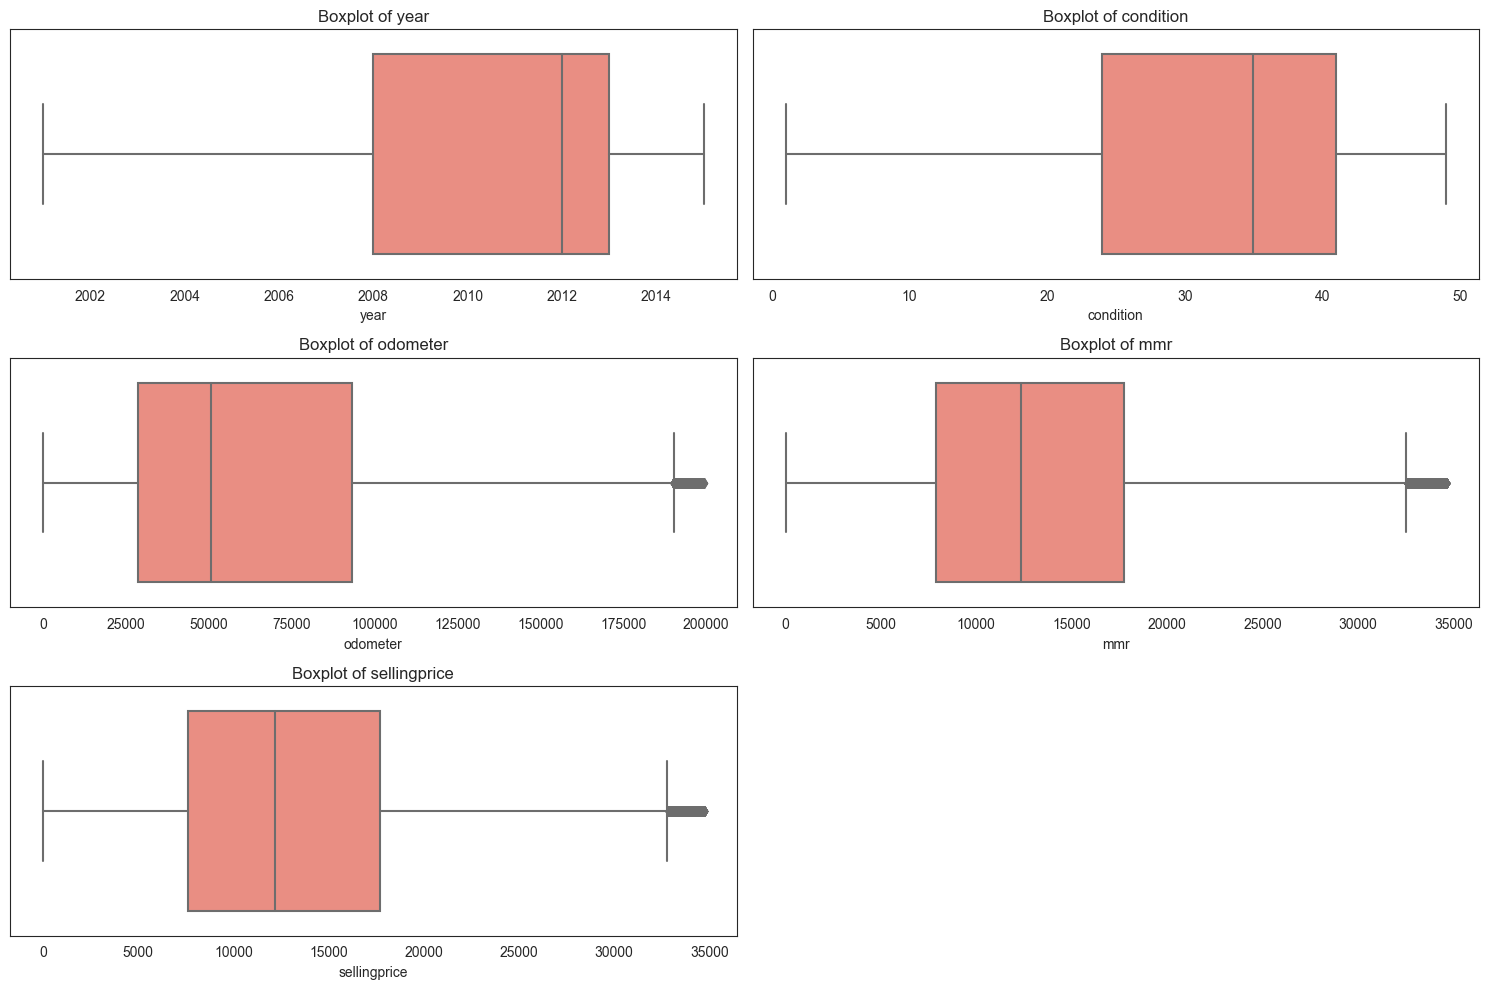

In [6]:
lower_bound, upper_bound = bound_counter(df)
    
mask = ((df.select_dtypes(include=['float64', 'int64']) >= lower_bound) & 
        (df.select_dtypes(include=['float64', 'int64']) <= upper_bound))

clean_data = df[mask.all(axis=1)]
print(outliers_counter(clean_data))
box_plot(clean_data)

In [7]:
clean_data = clean_data.copy()
clean_data['saledate'] = pd.to_datetime(clean_data['saledate'], utc=True)
clean_data['sale_year'] = clean_data['saledate'].dt.year
clean_data = clean_data[clean_data['sale_year'] == 2015]

### **Now when we clear our dataset from Nan values and useless columns let`s see some interesting information that consider this dataset**

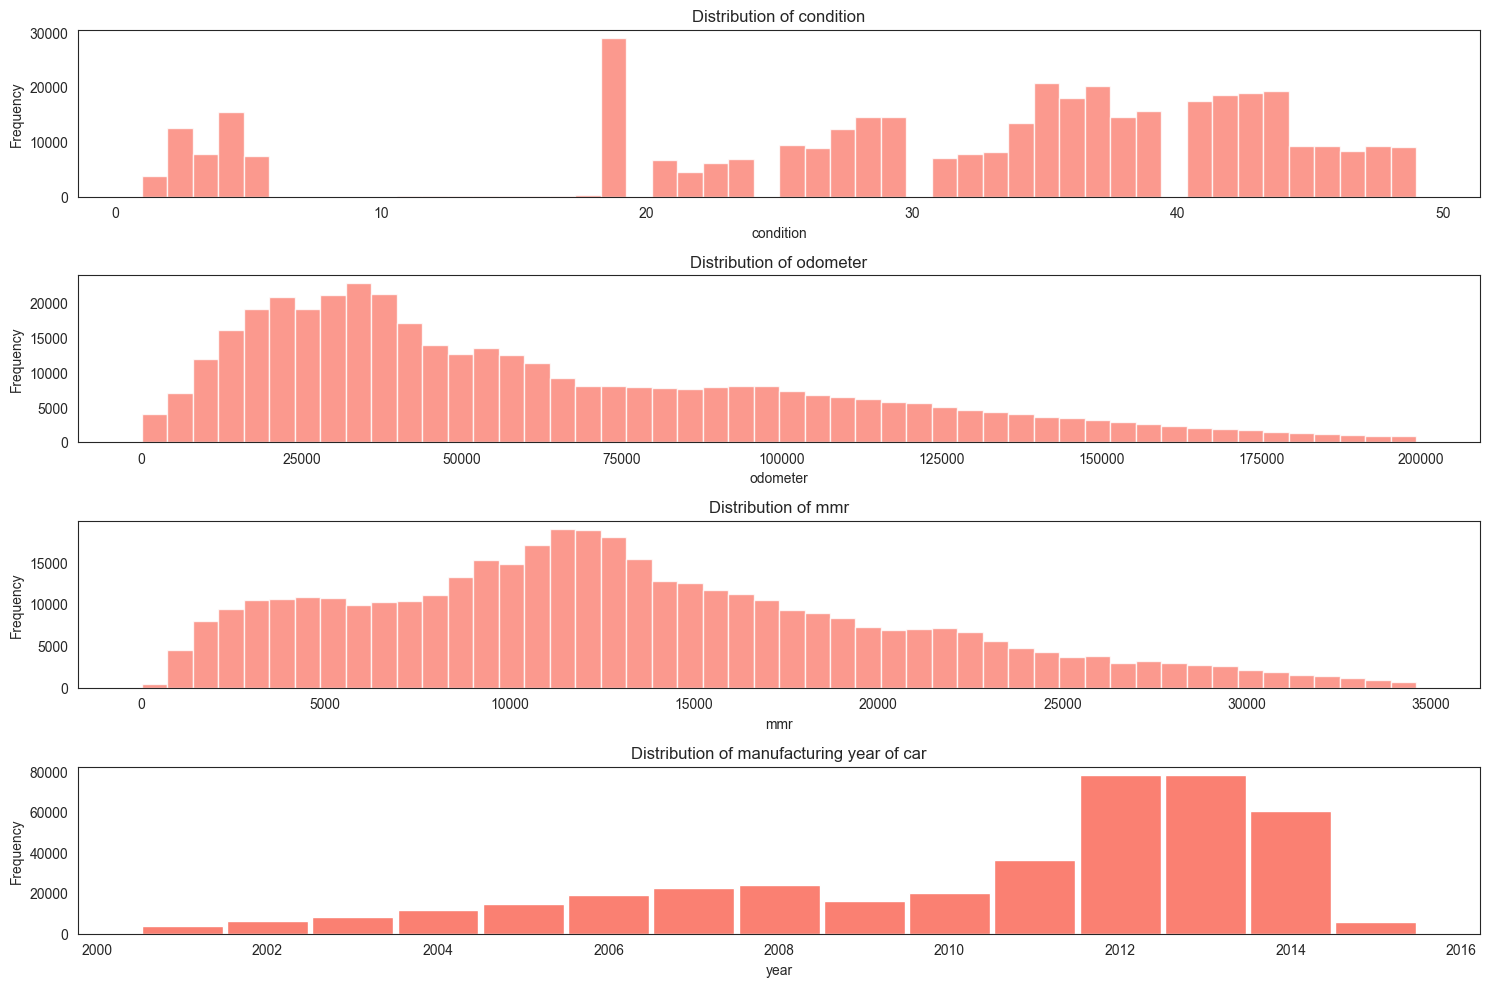

In [14]:
# plt.style.use('seaborn-white')

def plot_distribution(data_name: pd.DataFrame, column_name: list[str]) -> None:
    """
    The func plot distribution for columns in the dataframe
    :param data_name: Name of data
    :param column_name: name of column to plot
    """
    num_plots = len(column_name) + 1
    plt.figure(figsize=(15, 12))

    for num, name in enumerate(column_name, start=1):
        plt.subplot(num_plots, 1, num)
        if name == 'year':
            cars_sold_by_year = data_name[name].value_counts().sort_index()
            plt.bar(cars_sold_by_year.index, cars_sold_by_year.values, color='salmon', width=0.95)
            plt.title('Distribution of manufacturing year of car')

        else:
            plt.hist(data_name[name], bins=50, color='salmon', alpha=0.8)
            plt.title(f'Distribution of {name}')
            
        plt.xlabel(f'{name}')
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

plot_distribution(clean_data, ['condition', 'odometer', 'mmr', 'year'])

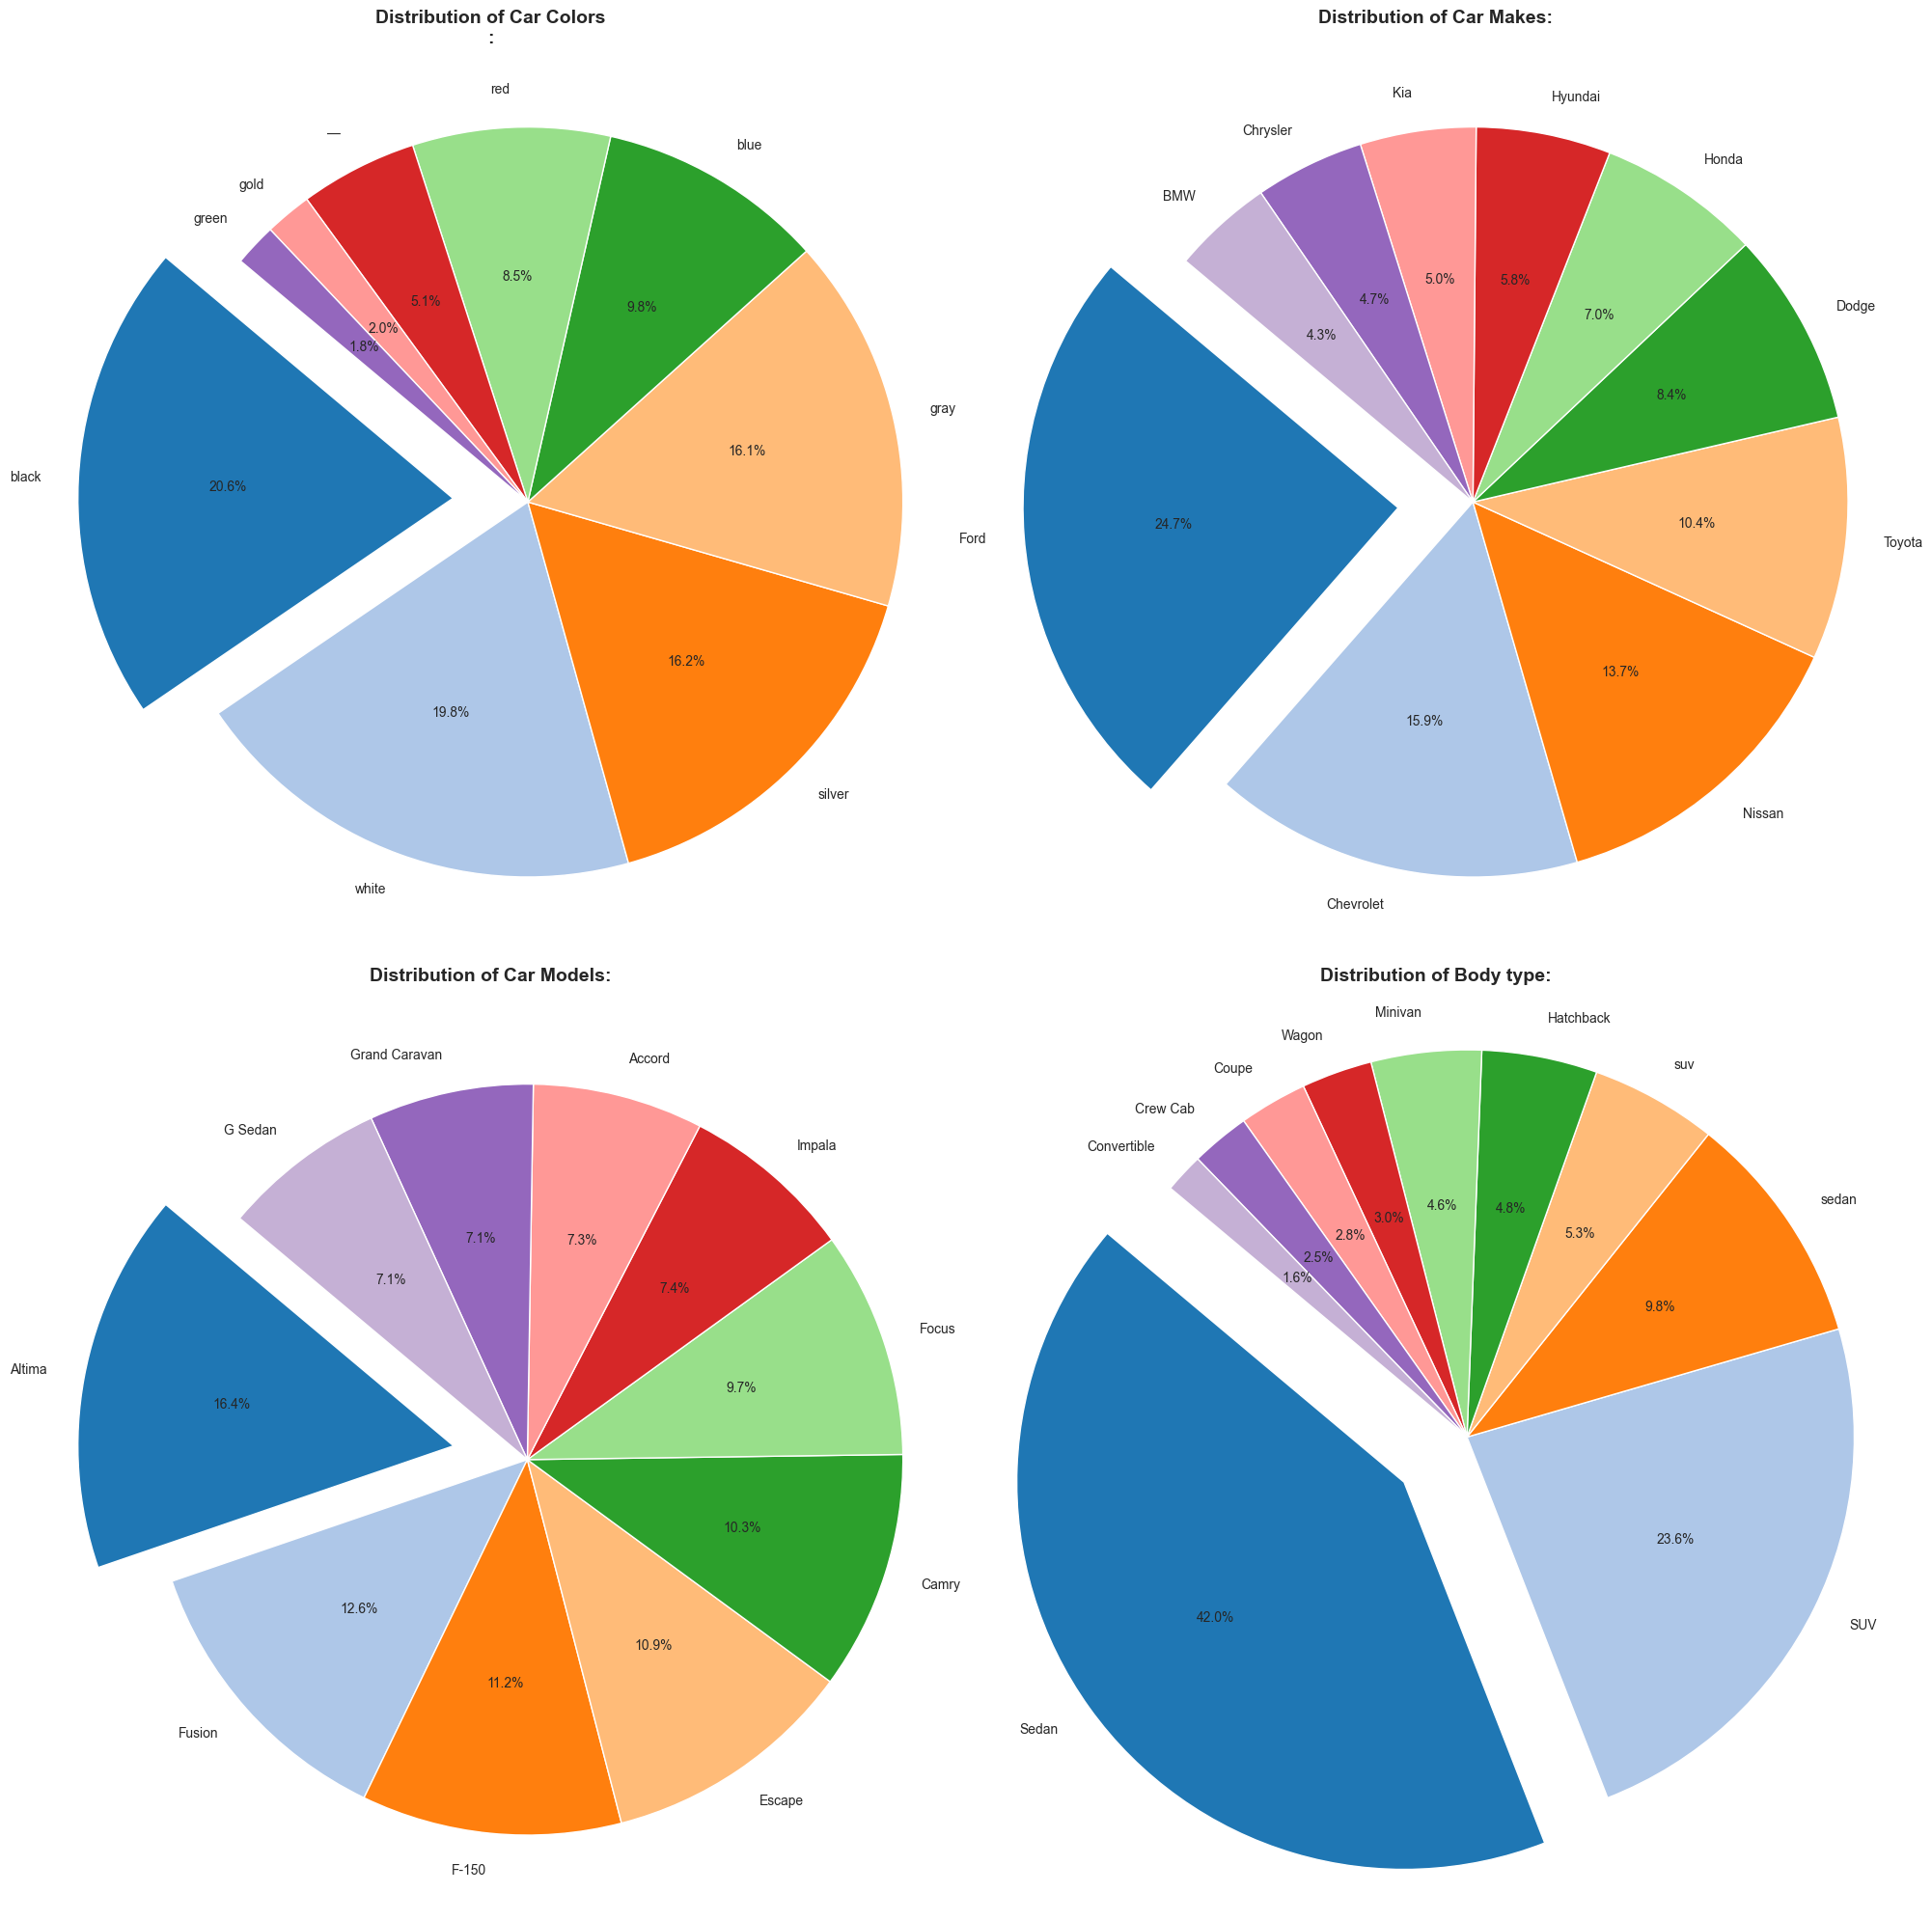

In [21]:
# Let`s see the moat popular color, model and brand
def plot_pie_chart(column, title, limit=10, ax=None):
    """
    The function plots a pie chart diagram
    :param column: name of column in dataset to plot
    :param title: title of plot
    :param limit: limit of chart
    :param ax: matplotlib axes to plot on
    :return: plot
    """
    counts = clean_data[column].value_counts().head(limit)
    colors = plt.cm.tab20.colors[:len(counts)]
    explode = (0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0)[:limit]
    
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode, wedgeprops=dict(width=1))
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.axis('equal')

fig, axs = plt.subplots(2, 2, figsize=(20, 20))

plot_pie_chart('color', 'Distribution of Car Colors\n:', limit=9, ax=axs[0, 0])
plot_pie_chart('make', 'Distribution of Car Makes:\n', ax=axs[0, 1])
plot_pie_chart('model', 'Distribution of Car Models:\n', ax=axs[1, 0])
plot_pie_chart('body', 'Distribution of Body type:\n', ax=axs[1, 1])

plt.tight_layout()
plt.show()

### Build an OLS model

In [24]:
# y = clean_data['sellingprice']
# 
# X = clean_data[['year', 'condition', 'odometer', 'mmr']]
# X = sm.add_constant(X)
# 
# model = sm.OLS(y, X).fit()
# model.summary()

X = clean_data[['year', 'condition', 'odometer', 'mmr']]  # додайте one-hot encoded змінні, якщо це необхідно
y = clean_data['sellingprice']

# Додавання константи (intercept)
X = sm.add_constant(X)

# Розбиття даних на навчальну та тестову вибірку
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Побудова моделі
model = sm.OLS(y_train, X_train).fit()

# Оцінка моделі
predictions = model.predict(X_test)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sellingprice   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                 1.822e+06
Date:                Sat, 13 Apr 2024   Prob (F-statistic):               0.00
Time:                        17:42:34   Log-Likelihood:            -2.8440e+06
No. Observations:              324945   AIC:                         5.688e+06
Df Residuals:                  324940   BIC:                         5.688e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.863e+04   2770.095     31.994      0.000    8.32e+04    9.41e+04
year         -44.5217      1.377    -32.339      0.000     -47.220     -41.823
condition     38.0836      0.217    175.187      0.000      37.658      38.510
odometer      -0.0022      0.000    -21.178      0.000      -0.002      -0.002
mmr            0.9766      0.001   1943.165      0.000       0.976       0.978
==============================================================================
Omnibus:                   113741.911   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4675479.474
Skew:                          -0.984   Prob(JB):                         0.00
Kurtosis:                      21.479   Cond. No.                     8.00e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  8e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# x_cols = clean_data[: -2]
# 
# 
# def select_model_aic(data, initial_columns, dependent_var_name):
#     """
#     Select variables by AIC
#     :param data: DataFrame
#     :param initial_columns: List of initial columns
#     :param dependent_var_name: Name of the dependent variable
#     :return: AIC DataFrame, best model
#     """
#     best_model = None
#     best_aic = float('inf')
#     columns = initial_columns[:]
#     aic_history = []
# 
#     while True:
#         improvement = False
#         models_with_aic = []
# 
#         for col in columns:
#             temp_columns = [c for c in columns if c != col]
#             temp_x = data[temp_columns]
#             temp_model = sm.OLS(endog=data[dependent_var_name], exog=sm.add_constant(temp_x)).fit()
#             models_with_aic.append((temp_model.aic, col, temp_model))
# 
#         models_with_aic.sort()
# 
#         if models_with_aic and models_with_aic[0][0] < best_aic:
#             best_aic = models_with_aic[0][0]
#             best_model = models_with_aic[0][2]
#             dropped_col = models_with_aic[0][1]
#             aic_history.append({'dropped': dropped_col, 'model_AIC': best_aic})
#             columns = [c for c in columns if c != dropped_col]
#             improvement = True
# 
#         if not improvement:
#             break
#             
#     aic_df = pd.DataFrame(aic_history).style.background_gradient(cmap='viridis').highlight_min(color="red", subset=["model_AIC"])
#     return aic_df, best_model
# 
# dropped_cols, best_model = select_model_aic(df, x_cols.columns, 'sellingprice')
# 
# dropped_cols
